In [1]:
import mne
#raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw = mne.io.read_raw_edf('/Users/seandmello/Downloads/fullNightCombined.edf', preload=True)
raw

Extracting EDF parameters from /Users/seandmello/Downloads/fullNightCombined.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: '/Users/seandmello/Downloads/fullNightCombined.edf'

In [2]:
print(raw.ch_names)

['CH 1', 'CH 2', 'CH 3', 'CH 4']


In [3]:
#raw.drop_channels(['CH 1', 'CH 2', 'CH 3'])
chan = raw.ch_names
print(chan)

['CH 1', 'CH 2', 'CH 3', 'CH 4']


In [4]:
print(raw.info['sfreq'])

257.0


In [5]:
raw.resample(100)
sf = raw.info['sfreq']
sf

100.0

In [10]:
# We use "verbose" and ";" to disable the text output
>>> raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



<RawEDF | fullNightCombined.edf, 4 x 2145800 (21458.0 s), ~65.5 MiB, data loaded>

In [11]:
import numpy as np

# Assuming 'raw' is an MNE Raw object
data = raw.get_data()

# Clip the EEG data between -200 and 200
data_clipped = np.clip(data, -200, 200)

# Now set the clipped data back into the raw object if needed
raw._data = data_clipped

In [12]:
data = raw.get_data(units="uV")
print(data.shape)

(4, 2145800)


In [13]:
import yasa

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


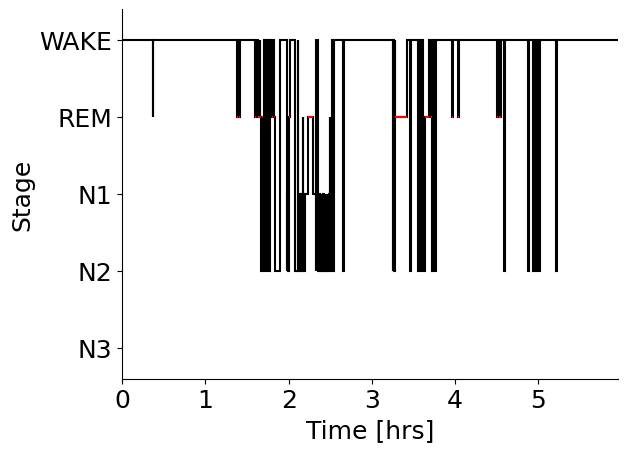

In [29]:
sls = yasa.SleepStaging(raw, eeg_name='CH 2')
sls

hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking

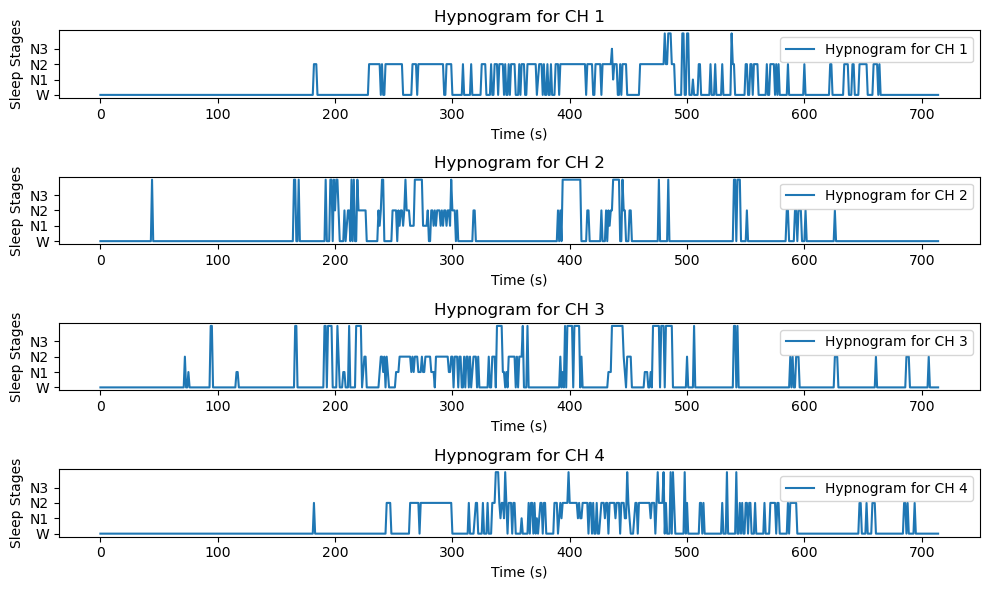

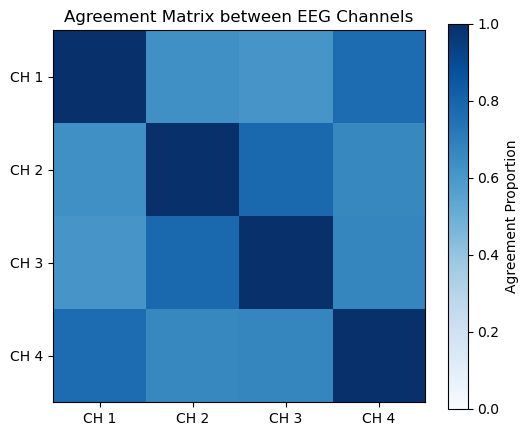

Agreement Matrix (proportion of sleep stages agreement):
[[1.         0.63076923 0.60839161 0.76783217]
 [0.63076923 1.         0.77902098 0.66293706]
 [0.60839161 0.77902098 1.         0.67132867]
 [0.76783217 0.66293706 0.67132867 1.        ]]


In [20]:
import yasa
import numpy as np
import matplotlib.pyplot as plt

# Assuming the 'raw' object from MNE is already loaded

# Define the EEG channels
eeg_channels = ['CH 1', 'CH 2', 'CH 3', 'CH 4']

# Dictionary to store hypnograms for each channel
hypnograms = {}

# Apply sleep staging for each channel and store the hypnogram
for ch in eeg_channels:
    sls = yasa.SleepStaging(raw, eeg_name=ch)
    hypno_pred = sls.predict()  # Predict the sleep stages
    hypno_pred_int = yasa.hypno_str_to_int(hypno_pred)  # Convert to numerical format
    hypnograms[ch] = hypno_pred_int  # Store the hypnogram

# Plot the hypnograms for all channels
plt.figure(figsize=(10, 6))
for idx, ch in enumerate(eeg_channels):
    plt.subplot(len(eeg_channels), 1, idx + 1)
    plt.plot(hypnograms[ch], label=f'Hypnogram for {ch}')
    plt.xlabel('Time (s)')
    plt.ylabel('Sleep Stages')
    plt.title(f'Hypnogram for {ch}')
    plt.yticks([0, 1, 2, 3], ['W', 'N1', 'N2', 'N3'])
    plt.legend()

plt.tight_layout()
plt.show()

# Now, let's calculate the agreement between the channels
# We can use a simple comparison of the hypnograms between channels
agreement_matrix = np.zeros((len(eeg_channels), len(eeg_channels)))

for i, ch1 in enumerate(eeg_channels):
    for j, ch2 in enumerate(eeg_channels):
        # Calculate the proportion of agreement between two channels
        agreement = np.mean(hypnograms[ch1] == hypnograms[ch2])
        agreement_matrix[i, j] = agreement

# Plot the agreement matrix
plt.figure(figsize=(6, 5))
plt.imshow(agreement_matrix, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Agreement Proportion')
plt.xticks(np.arange(len(eeg_channels)), eeg_channels)
plt.yticks(np.arange(len(eeg_channels)), eeg_channels)
plt.title('Agreement Matrix between EEG Channels')
plt.show()

# Output the agreement matrix
print("Agreement Matrix (proportion of sleep stages agreement):")
print(agreement_matrix)


In [21]:
sls

In [31]:
hypno_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4,
       0, 4, 2, 4, 4, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 4, 0, 4, 0, 0, 4,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 4, 2, 2, 2,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 4, 2,

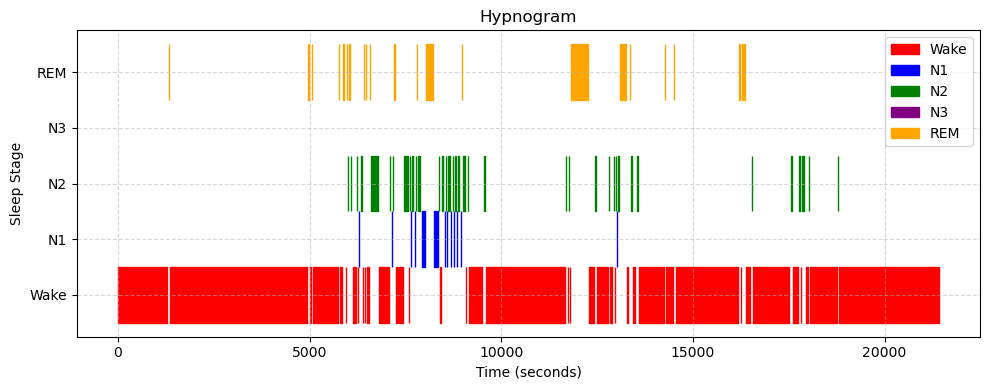

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Example hypnogram array (replace this with your `hypno_pred`)

# Define sleep stage labels and colors
stage_labels = {0: 'Wake', 1: 'N1', 2: 'N2', 3: 'N3', 4: 'REM'}
stage_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}

# Create a time vector (assuming 30-second epochs)
epoch_duration = 30  # seconds
time = np.arange(0, len(hypno_pred) * epoch_duration, epoch_duration)

# Plot the hypnogram
plt.figure(figsize=(10, 4))

for stage in stage_labels:
    plt.fill_between(
        time,
        y1=stage - 0.5,
        y2=stage + 0.5,
        where=(hypno_pred == stage),
        color=stage_colors[stage],
        label=stage_labels[stage]
    )

# Customize the plot
plt.yticks(list(stage_labels.keys()), list(stage_labels.values()))
plt.xlabel('Time (seconds)')
plt.ylabel('Sleep Stage')
plt.title('Hypnogram')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


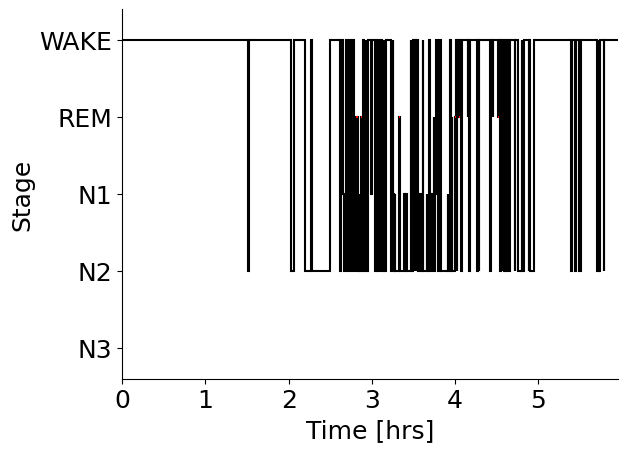

In [35]:
sls = yasa.SleepStaging(raw, eeg_name='CH 4')
sls

hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Select one channel by name (e.g., 'C3')
raw.pick(['CH 3'])  # Replace 'C3' with the desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Print the shape of the data
print("Data shape:", data.shape)  # Should be (1, n_samples)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)  # Removes singleton dimensions

# Print the shape of the data
print("Data shape:", data_1d.shape)  # Should be (n_samples,)

Selected channel: ['CH 3']
Data shape: (1, 2145800)
Data shape: (2145800,)


In [41]:
import numpy as np

# Assuming:
# - sf is the sampling frequency of the EEG data
# - hypno_pred is the hypnogram in 30-second epochs

# Example sampling frequency (replace with your actual value)
sf = 100  # in Hz

# Calculate the number of samples per epoch
samples_per_epoch = int(30 * 257)  # 30 seconds * sampling rate

# Repeat each sleep stage value to match the EEG data length
hypno_pred_expanded = np.repeat(hypno_pred, samples_per_epoch)

# Trim hypno_pred_expanded to match the length of data_1d
# (in case the last epoch is incomplete)
hypno_pred_expanded = hypno_pred_expanded[:len(data_1d)]

# Verify the lengths
print("Length of data:", len(data_1d))
print("Length of hypno_pred_expanded:", len(hypno_pred_expanded))

Length of data: 2145800
Length of hypno_pred_expanded: 2145800


In [45]:
fig = yasa.plot_spectrogram(data_1d, sf, hypno_pred_expanded, cmap='Spectral_r')

# Save the figure to a file
spectrogram_filename = "/Users/seandmello/Downloads/spectrogram.png"
fig.savefig(spectrogram_filename)

# Optionally, close the plot to avoid display issues in some environments
plt.close()

print(f"Spectrogram saved as {spectrogram_filename}")

Spectrogram saved as /Users/seandmello/Downloads/spectrogram.png


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Select one channel by name (e.g., 'CH 3')
raw.pick_channels(['CH 3'])  # Replace 'CH 3' with your desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Print the shape of the data
print("Data shape:", data.shape)  # Should be (1, n_samples)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)  # Removes singleton dimensions

# Print the shape of the data
print("Data shape:", data_1d.shape)  # Should be (n_samples,)

# Get the sampling frequency
sfreq = raw.info['sfreq']  # Sampling frequency in Hz

# Define the duration (1 minute)
duration_sec = 60  # 60 seconds

# Calculate the number of samples corresponding to 1 minute
num_samples = int(sfreq * duration_sec)

# Select only the first 1-minute portion of the data
data_1min = data_1d[:num_samples]
times_1min = times[:num_samples]

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(times_1min, data_1min, label="EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("1-Minute EEG Signal from Channel 'CH 3'")
plt.legend()
plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


ValueError: Missing channels from ch_names required by include:
['CH 3']

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected channel: ['CH 3']


Enter the start time in seconds:  1000


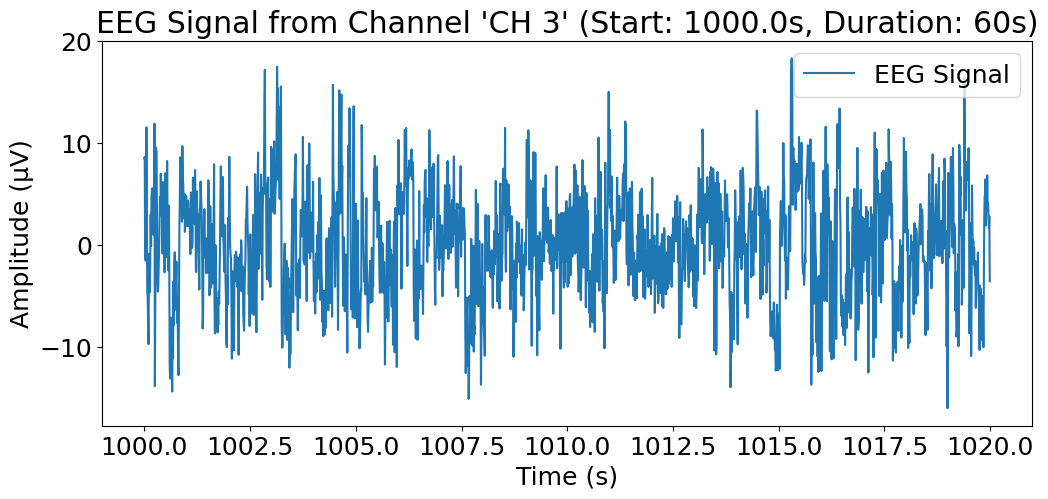

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Select one channel by name (e.g., 'CH 3')
raw.pick_channels(['CH 3'])  # Replace 'CH 3' with your desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)

# Get the sampling frequency
sfreq = raw.info['sfreq']  # Sampling frequency in Hz

# Allow user to choose the starting time
start_time_sec = float(input("Enter the start time in seconds: "))

# Define the duration (1 minute)
duration_sec = 20  

# Convert start time to sample index
start_sample = int(start_time_sec * sfreq)
end_sample = start_sample + int(duration_sec * sfreq)

# Ensure the selection does not exceed the data length
if end_sample > len(data_1d):
    print("Warning: Selected time range exceeds available data. Adjusting to fit.")
    end_sample = len(data_1d)
    start_sample = end_sample - int(duration_sec * sfreq)

# Select the data segment
data_segment = data_1d[start_sample:end_sample]
times_segment = times[start_sample:end_sample]

# Plot the selected data
plt.figure(figsize=(12, 5))
plt.plot(times_segment, data_segment, label="EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title(f"EEG Signal from Channel 'CH 3' (Start: {start_time_sec}s, Duration: 60s)")
plt.legend()
plt.show()


{'TIB': 357.5, 'SPT': 317.5, 'WASO': 222.5, 'TST': 95.0, 'N1': 18.5, 'N2': 44.5, 'N3': 0.0, 'REM': 32.0, 'NREM': 63.0, 'SOL': 36.0, 'Lat_N1': 37.5, 'Lat_N2': 36.0, 'Lat_N3': nan, 'Lat_REM': 47.0, '%N1': 19.473684210526315, '%N2': 46.8421052631579, '%N3': 0.0, '%REM': 33.68421052631579, '%NREM': 66.3157894736842, 'SE': 26.573426573426573, 'SME': 29.921259842519685}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


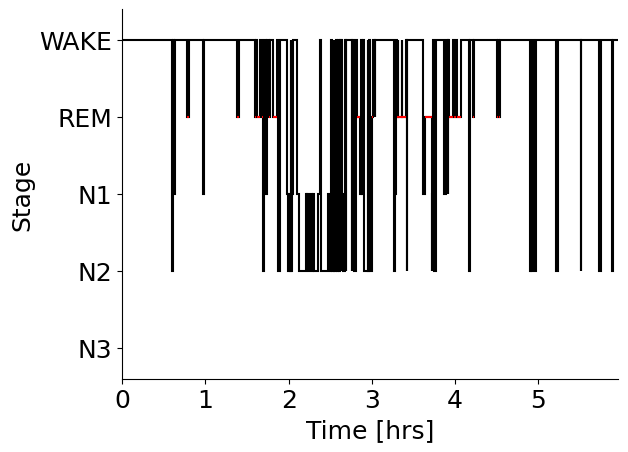

In [49]:
import yasa

# Assuming `raw` is your EEG data object (e.g., MNE Raw)
sls = yasa.SleepStaging(raw, eeg_name='CH 3')  # Set up the sleep staging object

# Predict sleep stages
hypno_pred = sls.predict()

# Convert the predicted sleep stages from string to integers (e.g., "W" -> 0, "N1" -> 1)
hypno_pred_int = yasa.hypno_str_to_int(hypno_pred)

# Plot the hypnogram
yasa.plot_hypnogram(hypno_pred_int)
sf_hyp = 1 / 30  # Example: One epoch = 30 seconds
stats = yasa.sleep_statistics(hypno_pred_int, sf_hyp=sf_hyp)
print(stats)



In [51]:
import yasa
import matplotlib.pyplot as plt
from fpdf import FPDF



# Calculate sleep statistics
sf_hyp = 1 / 30  # Example for 30-second epochs
stats = yasa.sleep_statistics(hypno_pred_int, sf_hyp=sf_hyp)



/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


ImportError: cannot import name 'psd_multitaper' from 'mne.time_frequency' (/opt/anaconda3/lib/python3.12/site-packages/mne/time_frequency/__init__.py)

In [53]:
# Create a PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, "Sleep Statistics Report", ln=True, align="C")

# Add sleep statistics (from `stats`)
pdf.ln(10)  # Line break
pdf.set_font("Arial", size=12)
for key, value in stats.items():
    pdf.cell(200, 10, f"{key}: {value}", ln=True)

# Add Spectral Density plot
pdf.ln(10)  # Line break
pdf.cell(200, 10, "Spectral Density", ln=True)
pdf.ln(5)  # Line break
pdf.image("/Users/seandmello/Downloads/spectrogram.png", x=10, w=180)

# Save the PDF
pdf_output_filename = "/Users/seandmello/Downloads/sleep_report.pdf"
pdf.output(pdf_output_filename)

# Provide download link
print(f"PDF report generated: {pdf_output_filename}")


PDF report generated: /Users/seandmello/Downloads/sleep_report.pdf


In [16]:
import os
import mne
import yasa
import numpy as np
import matplotlib.pyplot as plt
from mne.datasets.sleep_physionet.age import fetch_data

# =============================================================================
# 1. Download EDF file (if needed) and load data
# =============================================================================
data_dir = "./sleep_data"
os.makedirs(data_dir, exist_ok=True)
records = fetch_data(subjects=[0], recording=[1], path=data_dir)
edf_file = records[0]  # First file

raw = mne.io.read_raw_edf(edf_file[0], preload=True)
raw.resample(100)  # Downsample to 100 Hz

# =============================================================================
# 2. Select EEG channel
# =============================================================================
eeg_channels = [ch for ch in raw.ch_names if "EEG" in ch or "CH" in ch]
selected_channel = "CH 2" if "CH 2" in eeg_channels else eeg_channels[0]
raw.pick_channels([selected_channel])

# =============================================================================
# 3. Run Sleep Staging
# =============================================================================
sls = yasa.SleepStaging(raw, eeg_name=selected_channel)
hypno_pred = sls.predict()
hypno_pred = yasa.hypno_str_to_int(hypno_pred)
print(hypno_pred)
# Note: Original coding is:
#   0 = Wake, 1 = N1, 2 = N2, 3 = N3, 4 = REM

# =============================================================================
# 4. Create the Hypnogram (Step-like Plot)
#
# We want the y-axis (from top to bottom) to read: Wake, REM, N1, N2, N3.
# To do this, we remap the stages so that when we set ticks in descending order,
# Wake appears at the top and N3 at the bottom.
#
# For this, we use a mapping:
#   original 0 (Wake)  --> 4
#   original 4 (REM)   --> 3
#   original 1 (N1)    --> 2
#   original 2 (N2)    --> 1
#   original 3 (N3)    --> 0
# =============================================================================
stage_map = {0: 4, 4: 3, 1: 2, 2: 1, 3: 0}
hypno_mapped = np.array([stage_map[s] for s in hypno_pred])
epochs = np.arange(len(hypno_mapped))

# Colors for the hypnogram (using the same colors as desired):
# Mapped values: 4 = Wake, 3 = REM, 2 = N1, 1 = N2, 0 = N3.
hypno_colors = {
    4: "#FFC179",  # Wake
    3: "#F195AC",  # REM
    2: "#E3F195",  # N1
    1: "#95F1A8",  # N2
    0: "#95C8F1",  # N3
}

# =============================================================================
# 5. Create the Donut Chart Data (Sleep Stage Distribution)
#
# We use the original hypno_pred codes to count epochs in each stage.
# The order (for labeling and colors) will be: Wake, REM, N1, N2, N3.
#
# Each epoch is 30 seconds.
# =============================================================================
stage_names = ["Awake", "REM", "N1", "N2", "N3"]
counts = {name: 0 for name in stage_names}
for s in hypno_pred:
    if s == 0:
        counts["Awake"] += 1
    elif s == 4:
        counts["REM"] += 1
    elif s == 1:
        counts["N1"] += 1
    elif s == 2:
        counts["N2"] += 1
    elif s == 3:
        counts["N3"] += 1

data = [counts[name] for name in stage_names]

# Colors in the order: Wake, REM, N1, N2, N3
donut_colors = ["#FFC179", "#F195AC", "#E3F195", "#95F1A8", "#95C8F1"]

# Helper function: format epoch counts (30s each) as "xxh xxm"
def format_time(count):
    total_seconds = count * 30
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    return f"{int(hours)}h {int(minutes)}m"

# Create labels for each wedge: include stage name and formatted time
labels = [f"{stage}\n{format_time(counts[stage])}" for stage in stage_names]

# Compute total sleep time (sum REM, N1, N2, N3) for the donut center
sleep_count = counts["REM"] + counts["N1"] + counts["N2"] + counts["N3"]
total_sleep_str = format_time(sleep_count)




Extracting EDF parameters from /Users/jaeyoungkang/Documents/BME/4B/462/Sound2Sleep/sleep_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/4266853191.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/4266853191.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/4266853191.py:16: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)


Sampling frequency of the instance is already 100.0, returning unmodified.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
[0 0 0 ... 0 0 0]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


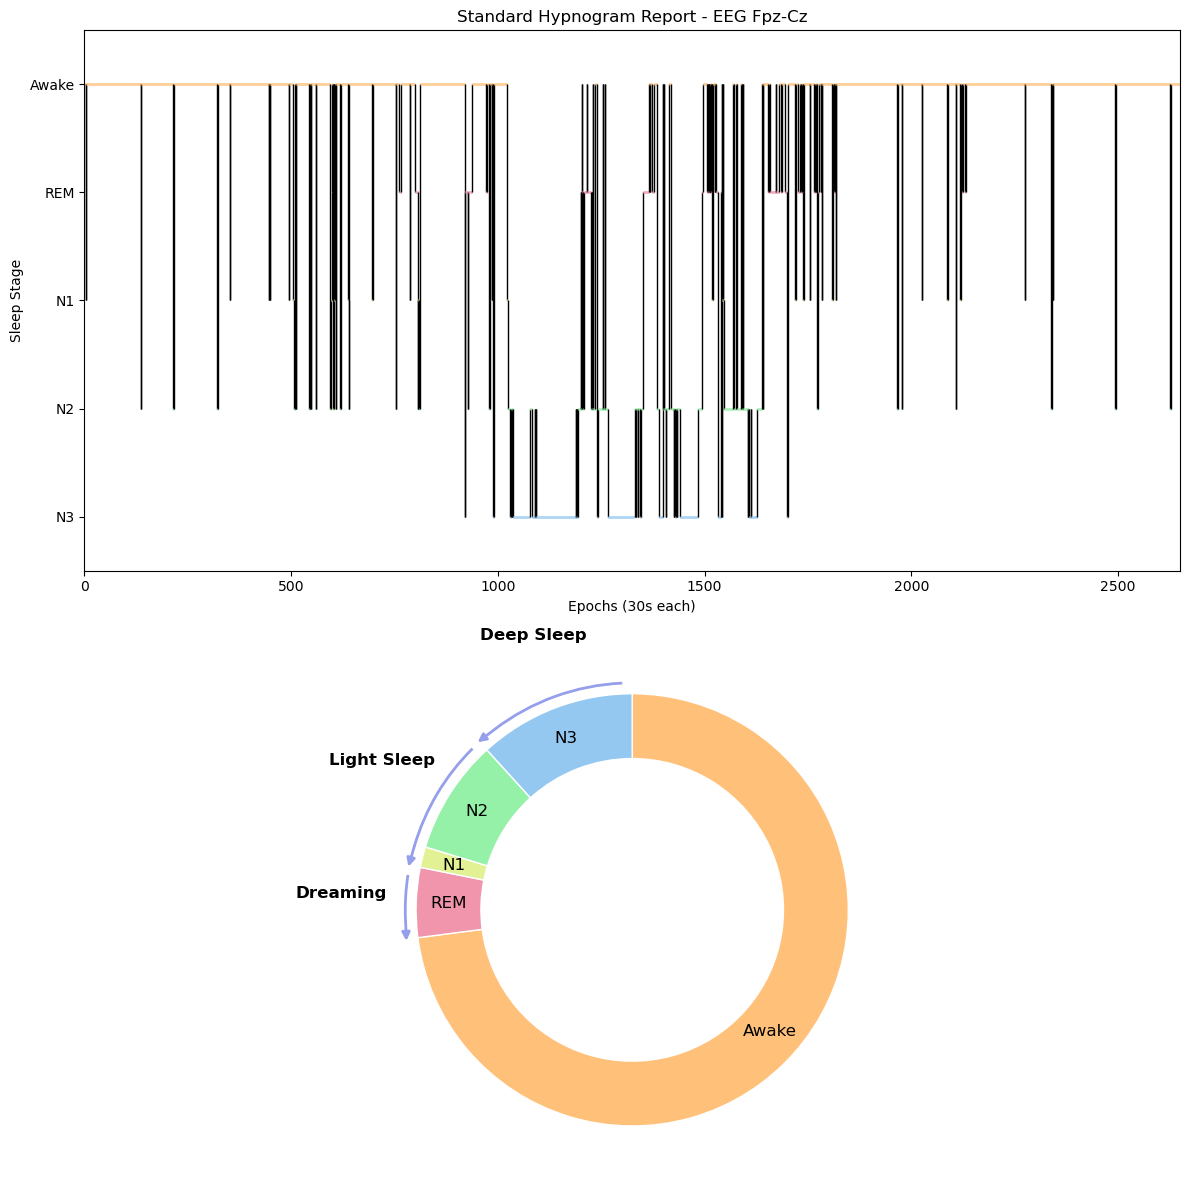

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, FancyArrowPatch

# Assume stage_names, data, donut_colors, and the donut chart have been created as follows:
# (Using the previous code snippet to create the donut chart)
width = 0.3  # width used in wedgeprops
fig, axs = plt.subplots(nrows=2, figsize=(12, 12))

# ----- Hypnogram (Step-like Plot) -----
ax = axs[0]
for i in range(len(epochs) - 1):
    ax.hlines(hypno_mapped[i], i, i+1, colors=hypno_colors[hypno_mapped[i]], linewidth=2)
    ax.vlines(i+1, hypno_mapped[i], hypno_mapped[i+1], colors='black', linewidth=1)
ax.hlines(hypno_mapped[-1], epochs[-1], epochs[-1] + 1, colors=hypno_colors[hypno_mapped[-1]], linewidth=2)
ax.set_yticks([4, 3, 2, 1, 0])
ax.set_yticklabels(["Awake", "REM", "N1", "N2", "N3"])
ax.set_xlim(0, len(epochs))
ax.set_ylim(-0.5, 4.5)
ax.set_xlabel("Epochs (30s each)")
ax.set_ylabel("Sleep Stage")
ax.set_title(f"Standard Hypnogram Report - {selected_channel}")
ax.grid(False)

## Define the wedge properties and data from your previous code:
width = 0.3  # width used in wedgeprops

# Create the donut chart without default labels
ax2 = axs[1]
wedges, _ = ax2.pie(data, colors=donut_colors, startangle=90, counterclock=False,
                    wedgeprops=dict(width=width, edgecolor='white'))

# Label each wedge with its stage name inside the donut.
for wedge, label in zip(wedges, stage_names):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    rad = np.deg2rad(angle)
    # Place the label at the midpoint of the donut ring.
    r = 1 - (width / 2)
    x = r * np.cos(rad)
    y = r * np.sin(rad)
    ax2.text(x, y, label, ha='center', va='center', fontsize=12, color='black')

# --- Now add circular arrows for the groups ---
# We want to create a slight gap between the arrows.
gap_deg = 5  # total gap in degrees; 2.5° on each end

def add_group_arc(theta_start, theta_end, group_label, arrow_color, r_arrow=1.05):
    # Draw an arc from theta_start to theta_end (in degrees) with center at (0,0)
    arc = Arc((0, 0), width=2*r_arrow, height=2*r_arrow,
              angle=0, theta1=theta_start, theta2=theta_end,
              lw=2, color=arrow_color)
    ax2.add_patch(arc)
    
    # Compute the midpoint angle for text placement.
    mid_angle = (theta_start + theta_end) / 2.0
    mid_rad = np.deg2rad(mid_angle)
    # Place the label outside the arc, following the circular curve (with no rotation adjustment)
    x_text = (r_arrow + 0.3) * np.cos(mid_rad)
    y_text = (r_arrow + 0.3) * np.sin(mid_rad)
    ax2.text(x_text, y_text, group_label, ha='center', va='center',
             fontsize=12, color='black', fontweight='bold')
    
    # Draw an arrow at the end of the arc:
    end_rad = np.deg2rad(theta_end)
    x_end = r_arrow * np.cos(end_rad)
    y_end = r_arrow * np.sin(end_rad)
    # Tangent direction at the endpoint: (-sin(theta_end), cos(theta_end))
    dx = 0.1 * (-np.sin(end_rad))
    dy = 0.1 * (np.cos(end_rad))
    arrow = FancyArrowPatch((x_end, y_end), (x_end+dx, y_end+dy),
                            arrowstyle='-|>', mutation_scale=12,
                            color=arrow_color, lw=2, shrinkA=0, shrinkB=0)
    ax2.add_patch(arrow)

# Our wedge order (based on stage_names): 
# index 0: Wake, 1: REM, 2: N1, 3: N2, 4: N3.
# Define groups (ignoring Wake):
# Group 1: REM (wedge index 1)
wedge_REM = wedges[1]
theta_rem_start = wedge_REM.theta1 + gap_deg/2
theta_rem_end   = wedge_REM.theta2 - 2*gap_deg/2
add_group_arc(theta_rem_start, theta_rem_end, "Dreaming", arrow_color='#959FEB', r_arrow=1.05)

# Group 2: Light Sleep (N1 and N2; wedges indices 2 and 3)
wedge_N1 = wedges[2]
wedge_N2 = wedges[3]
theta_ls_start = min(wedge_N1.theta1, wedge_N2.theta1) + gap_deg/2
theta_ls_end   = max(wedge_N1.theta2, wedge_N2.theta2) - 2*gap_deg/2
add_group_arc(theta_ls_start, theta_ls_end, "Light Sleep", arrow_color='#959FEB', r_arrow=1.05)

# Group 3: Deep Sleep (N3; wedge index 4)
wedge_N3 = wedges[4]
theta_deep_start = wedge_N3.theta1 + gap_deg/2
theta_deep_end   = wedge_N3.theta2 - 2*gap_deg/2
add_group_arc(theta_deep_start, theta_deep_end, "Deep Sleep", arrow_color='#959FEB', r_arrow=1.05)

plt.tight_layout()
plt.show()


Extracting EDF parameters from /Users/jaeyoungkang/Documents/BME/4B/462/Sound2Sleep/sleep_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/3865928075.py:17: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/3865928075.py:17: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/3865928075.py:17: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)


Sampling frequency of the instance is already 100.0, returning unmodified.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/3865928075.py:72: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle(


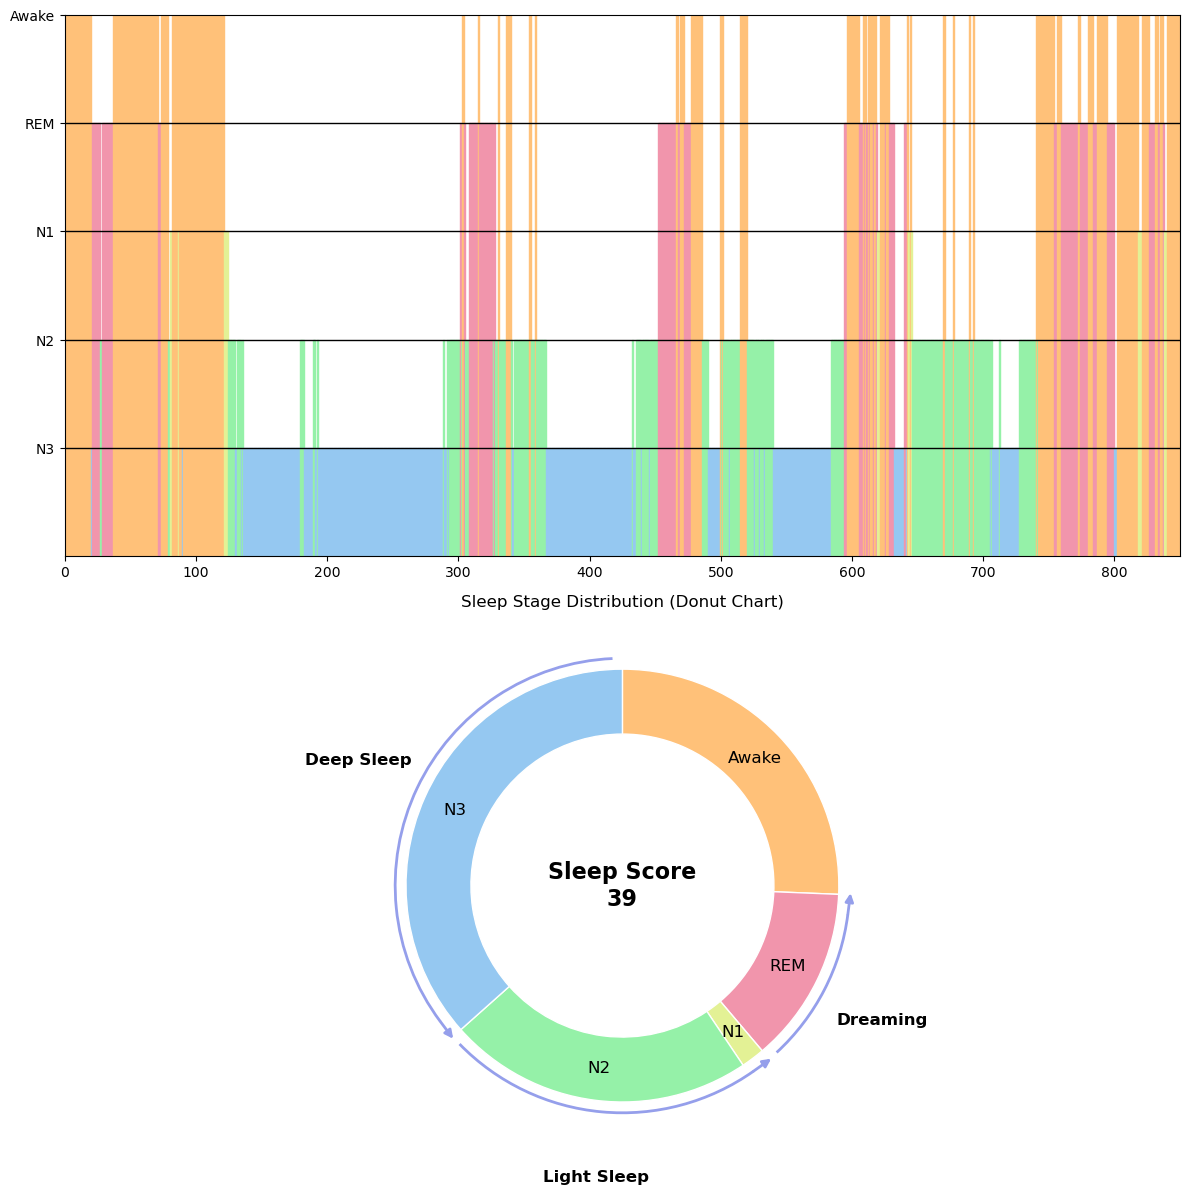

In [24]:
import os
import mne
import yasa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, FancyArrowPatch, Rectangle
from mne.datasets.sleep_physionet.age import fetch_data

# =============================================================================
# 1. Download EDF file (if needed) and load data
# =============================================================================
data_dir = "./sleep_data"
os.makedirs(data_dir, exist_ok=True)
records = fetch_data(subjects=[0], recording=[1], path=data_dir)
edf_file = records[0]  # First file

raw = mne.io.read_raw_edf(edf_file[0], preload=True)
raw.resample(100)  # Downsample to 100 Hz

# =============================================================================
# 2. Select EEG channel
# =============================================================================
eeg_channels = [ch for ch in raw.ch_names if "EEG" in ch or "CH" in ch]
selected_channel = "CH 2" if "CH 2" in eeg_channels else eeg_channels[0]
raw.pick_channels([selected_channel])

# =============================================================================
# 3. Run Sleep Staging
# =============================================================================
sls = yasa.SleepStaging(raw, eeg_name=selected_channel)
hypno_pred = sls.predict()
hypno_pred = yasa.hypno_str_to_int(hypno_pred)

# Trim epochs for demonstration
hypno_pred = hypno_pred[900:1750]

# Original coding: 0=Wake, 1=N1, 2=N2, 3=N3, 4=REM

# =============================================================================
# 4. Create the Layered Hypnogram
#
# We'll define 5 horizontal "rows" from top to bottom:
#   Awake (row index=4) → REM=3 → N1=2 → N2=1 → N3=0
# If the stage is 4 (Awake), fill from bottom=0 up to y=5.
# If the stage is 3 (REM), fill from bottom=0 up to y=4, etc.
# =============================================================================
# Map original codes to "layer indices":
#   0=Wake -> 4, 4=REM -> 3, 1=N1 -> 2, 2=N2 -> 1, 3=N3 -> 0
stage_map = {0: 4, 4: 3, 1: 2, 2: 1, 3: 0}
hypno_mapped = np.array([stage_map[s] for s in hypno_pred])

# Colors: (mapped) 4=Awake, 3=REM, 2=N1, 1=N2, 0=N3
hypno_colors = {
    4: "#FFC179",  # Awake
    3: "#F195AC",  # REM
    2: "#E3F195",  # N1
    1: "#95F1A8",  # N2
    0: "#95C8F1",  # N3
}

# We'll make a figure with 2 subplots:
fig, axs = plt.subplots(nrows=2, figsize=(12, 12))

# -- LAYERED Hypnogram on the first subplot --
ax = axs[0]

epochs = np.arange(len(hypno_mapped))

# For each epoch i, draw a rectangle from x=i..i+1, y=0..(stage+1).
for i, stage in enumerate(hypno_mapped):
    top_y = stage + 1  # e.g. if stage=4 => top_y=5 => fill entire column
    rect = Rectangle(
        (i, 0),             # bottom-left corner (x=i, y=0)
        width=1,            # 1 epoch wide
        height=top_y,       # fill up to row "stage+1"
        color=hypno_colors[stage],
        edgecolor="white"
    )
    ax.add_patch(rect)

# Draw horizontal lines to demarcate rows (Awake->REM->N1->N2->N3)
for row in range(1, 5):
    ax.hlines(row, 0, len(epochs), color="black", linewidth=1)

# Label the rows in the center
# We'll place them halfway between each horizontal boundary, e.g. at y=4.5, 3.5, etc.
ax.set_yticks([5, 4, 3, 2, 1])
ax.set_yticklabels(["Awake", "REM", "N1", "N2", "N3"])

ax.set_xlim(0, len(epochs))
ax.set_ylim(0, 5)

ax.grid(False)

# =============================================================================
# 5. Create Donut Chart Data (Sleep Stage Distribution)
# =============================================================================
stage_names = ["Awake", "REM", "N1", "N2", "N3"]
counts = {name: 0 for name in stage_names}
# Original codes: 0=Wake, 4=REM, 1=N1, 2=N2, 3=N3
for s in hypno_pred:
    if s == 0:
        counts["Awake"] += 1
    elif s == 4:
        counts["REM"] += 1
    elif s == 1:
        counts["N1"] += 1
    elif s == 2:
        counts["N2"] += 1
    elif s == 3:
        counts["N3"] += 1

data = [counts[name] for name in stage_names]
donut_colors = ["#FFC179", "#F195AC", "#E3F195", "#95F1A8", "#95C8F1"]

def format_time(count):
    total_seconds = count * 30
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    return f"{int(hours)}h {int(minutes)}m"

labels = [f"{stage}\n{format_time(counts[stage])}" for stage in stage_names]

sleep_count = counts["REM"] + counts["N1"] + counts["N2"] + counts["N3"]
total_sleep_str = format_time(sleep_count)

# Simple "sleep score" example
sleep_epochs = sleep_count
if sleep_epochs > 0:
    rem_pct = counts["REM"] / sleep_epochs
    n1_pct  = counts["N1"]  / sleep_epochs
    n2_pct  = counts["N2"]  / sleep_epochs
    n3_pct  = counts["N3"]  / sleep_epochs
    sleep_score = int(100 * (0.1 * rem_pct + 0.05 * n1_pct + 0.25 * n2_pct + 0.6 * n3_pct))
else:
    sleep_score = 0

# =============================================================================
# 6. Donut Chart with Group Arcs and Sleep Score in the Middle
# =============================================================================
ax2 = axs[1]

# Width of the ring for the donut
width = 0.3

wedges, _ = ax2.pie(
    data, colors=donut_colors, startangle=90, counterclock=False,
    wedgeprops=dict(width=width, edgecolor='white')
)

# Label each wedge with its stage name inside the donut
for wedge, label in zip(wedges, stage_names):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    rad = np.deg2rad(angle)
    r = 1 - (width / 2)
    x = r * np.cos(rad)
    y = r * np.sin(rad)
    ax2.text(x, y, label, ha='center', va='center', fontsize=12, color='black')

# Optional arcs grouping
gap_deg = 5

def add_group_arc(theta_start, theta_end, group_label, arrow_color, r_arrow=1.05):
    arc = Arc((0, 0), width=2*r_arrow, height=2*r_arrow,
              angle=0, theta1=theta_start, theta2=theta_end, lw=2, color=arrow_color)
    ax2.add_patch(arc)
    
    mid_angle = (theta_start + theta_end) / 2.0
    mid_rad = np.deg2rad(mid_angle)
    x_text = (r_arrow + 0.3) * np.cos(mid_rad)
    y_text = (r_arrow + 0.3) * np.sin(mid_rad)
    ax2.text(x_text, y_text, group_label, ha='center', va='center',
             fontsize=12, color='black', fontweight='bold')
    
    end_rad = np.deg2rad(theta_end)
    x_end = r_arrow * np.cos(end_rad)
    y_end = r_arrow * np.sin(end_rad)
    dx = 0.1 * (-np.sin(end_rad))
    dy = 0.1 * (np.cos(end_rad))
    arrow = FancyArrowPatch((x_end, y_end), (x_end + dx, y_end + dy),
                            arrowstyle='-|>', mutation_scale=12,
                            color=arrow_color, lw=2, shrinkA=0, shrinkB=0)
    ax2.add_patch(arrow)

# Example group arcs (optional). Indices: Awake=0, REM=1, N1=2, N2=3, N3=4
# Group 1: REM only
wedge_REM = wedges[1]
theta_rem_start = wedge_REM.theta1 + gap_deg/2
theta_rem_end   = wedge_REM.theta2 - 2*gap_deg/2
add_group_arc(theta_rem_start, theta_rem_end, "Dreaming", arrow_color='#959FEB', r_arrow=1.05)

# Group 2: Light Sleep (N1 + N2 => indices 2 and 3)
wedge_N1 = wedges[2]
wedge_N2 = wedges[3]
theta_ls_start = min(wedge_N1.theta1, wedge_N2.theta1) + gap_deg/2
theta_ls_end   = max(wedge_N1.theta2, wedge_N2.theta2) - 2*gap_deg/2
add_group_arc(theta_ls_start, theta_ls_end, "Light Sleep", arrow_color='#959FEB', r_arrow=1.05)

# Group 3: Deep Sleep (N3 => index 4)
wedge_N3 = wedges[4]
theta_deep_start = wedge_N3.theta1 + gap_deg/2
theta_deep_end   = wedge_N3.theta2 - 2*gap_deg/2
add_group_arc(theta_deep_start, theta_deep_end, "Deep Sleep", arrow_color='#959FEB', r_arrow=1.05)

# Add the sleep score in the center
ax2.text(0, 0, f"Sleep Score\n{sleep_score}", ha='center', va='center',
         fontsize=16, fontweight='bold', color='black')

ax2.set_title("Sleep Stage Distribution (Donut Chart)")
plt.tight_layout()
plt.show()


In [32]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import io
from PyQt5.QtWidgets import (
    QApplication, QWidget, QVBoxLayout, QHBoxLayout, QGridLayout, QLabel,
    QPushButton, QFrame, QStackedWidget, QSizePolicy, QTextEdit, QScrollArea
)
from PyQt5.QtGui import QFont, QPixmap
from PyQt5.QtCore import Qt

def add_group_arc(ax, theta_start, theta_end, group_label, arrow_color, r_arrow=1.05, is_ls=False, is_deep=False):
    arc = Arc((0, 0), width=2*r_arrow, height=2*r_arrow,
              angle=0, theta1=theta_start, theta2=theta_end, lw=2, color=arrow_color)
    ax.add_patch(arc)

    mid_angle = (theta_start + theta_end) / 2.0
    mid_rad = np.deg2rad(mid_angle)
    if is_ls:
        x_text = (r_arrow + 0.15) * np.cos(mid_rad)
        y_text = (r_arrow + 0.15) * np.sin(mid_rad)
    elif is_deep:
        x_text = (r_arrow + 0.4) * np.cos(mid_rad)
        y_text = (r_arrow + 0.4) * np.sin(mid_rad)
    else:
        x_text = (r_arrow + 0.3) * np.cos(mid_rad)
        y_text = (r_arrow + 0.3) * np.sin(mid_rad)
    ax.text(x_text, y_text, group_label, ha='center', va='center',
            fontsize=12, color='white', fontweight='bold')

    # Add an arrow at the end of the arc
    end_rad = np.deg2rad(theta_end)
    x_end = r_arrow * np.cos(end_rad)
    y_end = r_arrow * np.sin(end_rad)
    dx = 0.1 * (-np.sin(end_rad))
    dy = 0.1 * (np.cos(end_rad))
    arrow = FancyArrowPatch((x_end, y_end), (x_end + dx, y_end + dy),
                            arrowstyle='-|>', mutation_scale=12,
                            color=arrow_color, lw=2, shrinkA=0, shrinkB=0)
    ax.add_patch(arrow)

def generate_sleep_figure():
    # 1. Download EDF file and load data
    data_dir = "./sleep_data"
    os.makedirs(data_dir, exist_ok=True)
    records = fetch_data(subjects=[0], recording=[1], path=data_dir)
    edf_file = records[0]  # First file

    raw = mne.io.read_raw_edf(edf_file[0], preload=True)
    raw.resample(100)  # Downsample to 100 Hz

    # 2. Select EEG channel
    eeg_channels = [ch for ch in raw.ch_names if "EEG" in ch or "CH" in ch]
    selected_channel = "CH 2" if "CH 2" in eeg_channels else eeg_channels[0]
    raw.pick_channels([selected_channel])

    # 3. Run Sleep Staging
    sls = yasa.SleepStaging(raw, eeg_name=selected_channel)
    hypno_pred = sls.predict()
    hypno_pred = yasa.hypno_str_to_int(hypno_pred)
    hypno_pred = hypno_pred[900:1750]

    # 4. Prepare donut chart data
    stage_names = ["Awake", "REM", "N1", "N2", "N3"]
    counts = {name: 0 for name in stage_names}
    for s in hypno_pred:
        if s == 0:
            counts["Awake"] += 1
        elif s == 4:
            counts["REM"] += 1
        elif s == 1:
            counts["N1"] += 1
        elif s == 2:
            counts["N2"] += 1
        elif s == 3:
            counts["N3"] += 1

    data = [counts[name] for name in stage_names]
    donut_colors = ["#FFC179", "#F195AC", "#E3F195", "#95F1A8", "#95C8F1"]

    def format_time(count):
        total_seconds = count * 30
        hours = total_seconds // 3600
        minutes = (total_seconds % 3600) // 60
        return f"{int(hours)}h {int(minutes)}m"

    sleep_count = counts["REM"] + counts["N1"] + counts["N2"] + counts["N3"]
    total_sleep_str = format_time(sleep_count)

    if sleep_count > 0:
        TST = sleep_count * 0.5  # total sleep time in minutes
        sleep_duration_factor = min(1, TST / 420)  # 7 hours = 420 minutes
        rem_pct = counts["REM"] / sleep_count
        n1_pct  = counts["N1"] / sleep_count
        n2_pct  = counts["N2"] / sleep_count
        n3_pct  = counts["N3"] / sleep_count
        sleep_quality_factor = 0.35 * n3_pct + 0.25 * rem_pct + 0.40 * (n1_pct + n2_pct)
        sleep_score = int((0.5 * sleep_duration_factor + 0.5 * sleep_quality_factor) * 100)
    else:
        sleep_score = 0

    stage_map = {0: 4, 4: 3, 1: 2, 2: 1, 3: 0}
    hypno_mapped = np.array([stage_map[s] for s in hypno_pred])
    epochs = np.arange(len(hypno_mapped))

    hypno_colors = {
        4: "#FFC179",  # Awake
        3: "#F195AC",  # REM
        2: "#E3F195",  # N1
        1: "#95F1A8",  # N2
        0: "#95C8F1",  # N3
    }

    # 6. Create the figure and subplots
    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10))
    fig.patch.set_facecolor("#1A0033")
    ax0.set_facecolor("#1A0033")
    ax1.set_facecolor("#1A0033")

    # --- Donut Chart (ax0) ---
    width = 0.3
    wedges, _ = ax0.pie(
        data, colors=donut_colors, startangle=90, counterclock=False,
        wedgeprops=dict(width=width, edgecolor='white')
    )
    ax0.axis('equal')
    for spine in ax0.spines.values():
        spine.set_visible(False)
    ax0.set_frame_on(False)
    ax0.set_xticks([])
    ax0.set_yticks([])

    ax0.text(0.5, 1.1, "Welcome to your sleep report!", ha='center', va='bottom',
             fontsize=14, fontweight='bold', color='white', transform=ax0.transAxes)
    ax0.text(0.5, 1.02, f"Sleep Score: {sleep_score}", ha='center', va='bottom',
             fontsize=13, fontweight='bold', color='white', transform=ax0.transAxes)
    
    for wedge, label_name in zip(wedges, stage_names):
        angle = (wedge.theta2 + wedge.theta1) / 2.0
        rad = np.deg2rad(angle)
        r = 1 - (width / 2)
        x = r * np.cos(rad)
        y = r * np.sin(rad)
        ax0.text(x, y, label_name, ha='center', va='center',
                 fontsize=10, color='black', fontweight='bold')

    stage_lines = [f"{stg}: {format_time(counts[stg])}" for stg in stage_names]
    stage_text = "\n".join(stage_lines)
    ax0.text(0.5, -0.15, stage_text, ha='center', va='top', fontsize=11,
             color='black', transform=ax0.transAxes)

    ax0.text(0, 0, f"Total Sleep Time:\n{total_sleep_str}", 
             ha='center', va='center', fontsize=12, color='black', fontweight='bold')

    gap_deg = 5 

    wedge_REM = wedges[1]  
    theta_rem_start = wedge_REM.theta1 + gap_deg/2
    theta_rem_end   = wedge_REM.theta2 - 2*gap_deg/2
    add_group_arc(ax0, theta_rem_start, theta_rem_end, "Dreaming", arrow_color='#959FEB', r_arrow=1.05)

    wedge_N1 = wedges[2]
    wedge_N2 = wedges[3]
    theta_ls_start = min(wedge_N1.theta1, wedge_N2.theta1) + gap_deg/2
    theta_ls_end   = max(wedge_N1.theta2, wedge_N2.theta2) - 2*gap_deg/2
    add_group_arc(ax0, theta_ls_start, theta_ls_end, "Light Sleep", arrow_color='#959FEB', r_arrow=1.05, is_ls=True)

    wedge_N3 = wedges[4]
    theta_deep_start = wedge_N3.theta1 + gap_deg/2
    theta_deep_end   = wedge_N3.theta2 - 2*gap_deg/2
    add_group_arc(ax0, theta_deep_start, theta_deep_end, "Deep Sleep", arrow_color='#959FEB', r_arrow=1.05, is_deep=True)   

    window = 30
    smooth_hypno = np.empty_like(hypno_mapped, dtype=float)
    half_window = window // 2
    for i in range(len(hypno_mapped)):
        start = max(0, i - half_window)
        end = min(len(hypno_mapped), i + half_window + 1)
        smooth_hypno[i] = np.mean(hypno_mapped[start:end])

    for i in range(len(epochs)-1):
        stage_val = int(np.rint(smooth_hypno[i]))
        color = hypno_colors.get(stage_val, "blue")
        ax1.plot(epochs[i:i+2], smooth_hypno[i:i+2], color=color, linewidth=2)

    for row in range(1, 5):
        ax1.hlines(row, 0, len(epochs), color="black", linewidth=1, alpha=0.1)

    ax1.spines["left"].set_visible(True)
    ax1.spines["left"].set_color("black")
    ax1.spines["bottom"].set_visible(True)
    ax1.spines["bottom"].set_color("black")
    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)

    ax1.set_yticks([4, 3, 2, 1, 0])
    ax1.set_yticklabels(["Awake", "REM", "N1", "N2", "N3"], color='black')
    ax1.set_ylim(-0.5, 4.5)

    xticks = np.arange(0, len(epochs)+1, 60)
    xtick_labels = [f"{int((t*0.5)//60)}h" if (t % 120 == 0) else "" for t in xticks]
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xtick_labels, color='black')
    ax1.set_xlim(0, len(epochs))

    ax1.grid(False)

    legend_handles = [
        Patch(facecolor=hypno_colors[4], label="Awake"),
        Patch(facecolor=hypno_colors[3], label="REM"),
        Patch(facecolor=hypno_colors[2], label="N1"),
        Patch(facecolor=hypno_colors[1], label="N2"),
        Patch(facecolor=hypno_colors[0], label="N3")
    ]
    ax1.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.1),
               ncol=5, frameon=False)

    for text in ax1.get_legend().get_texts():
        text.set_color("black")

    plt.tight_layout()
    return fig, total_sleep_str

def generate_and_display_report():
    fig, total_sleep_str = generate_sleep_figure()

    # Set transparency for display (all axes become transparent)
    fig.patch.set_alpha(0.0)
    for ax in fig.get_axes():
        ax.set_facecolor("none")
    
    # --- Save only the hypnogram (ax1) as a transparent PDF ---
    # Assuming ax0 is the donut chart and ax1 is the hypnogram:
    ax1 = fig.get_axes()[1]
    # Force a draw so that we can compute a tight bounding box for ax1
    fig.canvas.draw()
    bbox = ax1.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig("hypnogram.pdf", format="pdf", transparent=True, bbox_inches=bbox)
    
    # --- Create a PNG for GUI display ---
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    buf.seek(0)

    pixmap = QPixmap()
    pixmap.loadFromData(buf.getvalue(), 'PNG')
    buf.close()
    plt.close(fig)
    
    return pixmap, f"You were asleep for {total_sleep_str}"

# Then call the function like this:
pixmap, sleep_text = generate_and_display_report()


Extracting EDF parameters from /Users/jaeyoungkang/Documents/BME/4B/462/Sound2Sleep/sleep_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/1777929663.py:48: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/1777929663.py:48: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)
/var/folders/3c/_yd6_n9s6hs5fb1nt1gzdd2m0000gn/T/ipykernel_86933/1777929663.py:48: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file[0], preload=True)


Sampling frequency of the instance is already 100.0, returning unmodified.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
